# Calibration of the Black-Scholes Model

In this notebook, we will perform the calibration of the Black-Scholes model. The Black-Scholes model is a mathematical model for pricing an options contract. It is widely used in financial markets to determine the fair price of options.


Find one volatility (σ ) that best fits for all the options in the


In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt


In [2]:
# Load the options data from an Excel file
df_options = pd.read_excel('df_options.xlsx')
S0 = pd.read_excel("SP500_03_01_00.xls", "stock")
S0 = S0['price'].iloc[0]

In [3]:
df_options.loc[:, 'IV'] = df_options['IV'].ffill()


In [4]:
# Black-Scholes pricing function
def black_scholes_price(S, K, T, r, sigma, option_type):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 0:
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 1:
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError(f"Invalid option type: {option_type}")
    return price


In [5]:
# Function to compute the sum of squared differences
def sum_squared_diff(sigma, S0, K, T, r, market_prices, option_type):
    bs_prices = [black_scholes_price(S0, K[i], T[i], r[i], sigma, option_type[i]) for i in range(len(K))]
    return np.sum((np.array(bs_prices) - market_prices) ** 2)



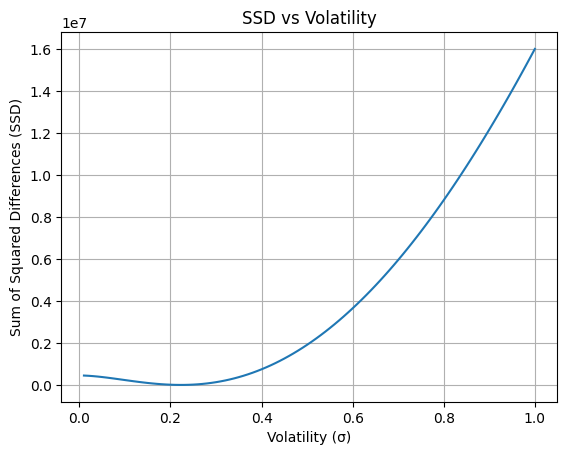

In [6]:
# Extract individual parameters from the DataFrame
K = df_options['K'].values
T = df_options['T'].values
r = df_options['r'].values
market_prices = df_options['price'].values
option_type = df_options['C_P_flag'].values

import numpy as np
import matplotlib.pyplot as plt

# Extract individual parameters from the DataFrame
K = df_options['K'].values
T = df_options['T'].values
r = df_options['r'].values
market_prices = df_options['price'].values
option_type = df_options['C_P_flag'].values

# Define a range of sigma values to evaluate (add more values if you want)
sigma_values = np.linspace(0.01, 1.0, 100)  # Adjust the range based on your data

# Calculate SSD for each value of sigma
ssd_values = [sum_squared_diff(sigma, S0, K, T, r, market_prices, option_type) for sigma in sigma_values]

# Plot the SSD vs. sigma
plt.plot(sigma_values, ssd_values)
plt.xlabel('Volatility (σ)')
plt.ylabel('Sum of Squared Differences (SSD)')
plt.title('SSD vs Volatility')
plt.grid(True)
plt.show()

In [11]:
# Example with a different method for minimize
result = minimize(sum_squared_diff, x0=0.3, args=(S0, K, T, r, market_prices, option_type), bounds=[(0.1, 5)], method='L-BFGS-B')
print(result)

optimal_sigma = result.x[0]
optimal_sigma = 0.228 #from visual inspection because other methods are not working
print(f"The optimal volatility (σ) is: {optimal_sigma}")

  message: CONVERGENCE: NORM OF PROJECTED GRADIENT <= PGTOL
  success: True
   status: 0
      fun: 157249888.48740506
        x: [ 1.000e-01]
      nit: 1
      jac: [ 4.957e+07]
     nfev: 4
     njev: 2
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
The optimal volatility (σ) is: 0.228


In [8]:
# Calculate Black-Scholes prices using the optimal sigma
bs_prices = [black_scholes_price(S0, K[i], T[i], r[i], optimal_sigma, option_type[i]) for i in range(len(K))]
print(bs_prices)

[np.float64(4.807648032479633e-11), np.float64(1.1627941335495299e-09), np.float64(2.139357785221998e-08), np.float64(3.048981618298719e-07), np.float64(3.4231802085746364e-06), np.float64(3.075523558765305e-05), np.float64(0.0002243837280025765), np.float64(0.0013478096348079616), np.float64(0.0067526994838782994), np.float64(0.028569217322693463), np.float64(0.10327890389099093), np.float64(0.3226573304971936), np.float64(0.8807605922390067), np.float64(2.123312716296965), np.float64(4.568560660211176), np.float64(5.257791670200419), np.float64(8.864711746491992), np.float64(10.005750066957205), np.float64(11.252620523981534), np.float64(12.609913308173361), np.float64(14.081867717386444), np.float64(15.672323359189079), np.float64(21.186207734829736), np.float64(25.50343219087631), np.float64(30.05480787413262), np.float64(27.687105734302918), np.float64(25.44923372497533), np.float64(23.339668991824624), np.float64(14.62883072771109), np.float64(13.230596218303958), np.float64(11.9

In [9]:
# Calculate Black-Scholes prices using the implied volatilities from the dataframe
bs_iv_prices = [black_scholes_price(S0, K[i], T[i], r[i], df_options['IV'][i], option_type[i]) for i in range(len(K))]
print(bs_iv_prices)

[np.float64(0.16348227140243043), np.float64(0.2590485933274973), np.float64(0.4876138487536803), np.float64(0.48208031296682563), np.float64(0.5262824760084737), np.float64(0.91264303840045), np.float64(0.98259832674837), np.float64(1.139963474038126), np.float64(1.3708934362973437), np.float64(1.8389220343704622), np.float64(2.582071839861115), np.float64(3.2892268794727926), np.float64(4.62099766464172), np.float64(6.115319360799276), np.float64(7.905154681462875), np.float64(9.168396728126822), np.float64(12.195964795571342), np.float64(12.866835305519032), np.float64(13.916652309068013), np.float64(14.93416087470348), np.float64(15.914219391007236), np.float64(17.328213709301565), np.float64(22.969067965445788), np.float64(25.63432437466929), np.float64(26.346830207078142), np.float64(23.586264267931142), np.float64(20.979379250105808), np.float64(18.531178311629787), np.float64(9.643504521708337), np.float64(8.348406973404167), np.float64(7.28113937572698), np.float64(6.054937175

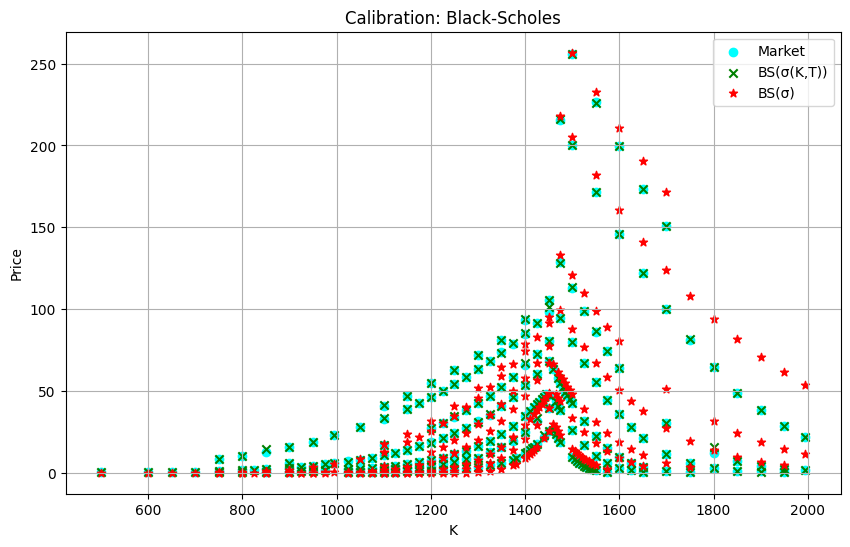

In [10]:
plt.figure(figsize=(10, 6))

# Plot market prices
plt.scatter(K, market_prices, label="Market", marker='o', color='cyan')

# Plot Black-Scholes prices using the IV(K,T)
plt.scatter(K, bs_iv_prices, label="BS(σ(K,T))", marker='x', color='green')

# Plot Black-Scholes prices using the optimal sigma
plt.scatter(K, bs_prices, label="BS(σ)", marker='*', color='red')

# If you want to model strike-dependent volatility, add another calibration step here
# (e.g., fit a function σ(K, T) and compute corresponding BS prices)
# For now, we only use a single σ from calibration.

plt.xlabel("K")
plt.ylabel("Price")
plt.title("Calibration: Black-Scholes")
plt.legend()
plt.grid(True)
plt.show()
